# Building a song recommender

# 1.Read and explore the dataset. 

In [12]:
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load music data

In [18]:
prod_df = pandas.read_csv('product_ratings.csv',header=None)
prod_df.columns = ['prod_id', 'prod_name', 'rating','user_id']

In [19]:
print(prod_df.head())
len(prod_df)

          prod_id   prod_name  rating     user_id
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


7824482

# Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

NameError: name 'song_df' is not defined

## Length of the dataset

In [6]:
len(song_df)
song_df = song_df.head(10000)
len(song_df)

10000

## Create a subset of the dataset

In [7]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

## Showing the most popular songs in the dataset

In [8]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
4378,The Scientist - Coldplay,27,0.27
4712,Use Somebody - Kings Of Leon,27,0.27
3476,Revelry - Kings Of Leon,26,0.26
1387,Fireflies - Charttraxx Karaoke,24,0.24
1862,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,0.23


## Count number of unique users in the dataset

In [9]:
users = song_df['user_id'].unique()

In [10]:
len(users)

365

## Quiz 1. Count the number of unique songs in the dataset

In [11]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

5151

# Create a song recommender

In [12]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [13]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [15]:
user_id = users[20]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Sehr kosmisch - Harmonia,37,1.0
4083,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Undo - Björk,27,2.0
931,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,You're The One - Dwight Yoakam,24,4.0
3034,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Revelry - Kings Of Leon,21,5.0
3189,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Secrets - OneRepublic,21,6.0
4112,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Use Somebody - Kings Of Leon,21,7.0
1207,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Fireflies - Charttraxx Karaoke,20,8.0
1577,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Hey_ Soul Sister - Train,19,9.0
1626,0afaa5d9d04bf85af720fe8cc566a41ca3e41c97,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [16]:
user_id = users[7]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Sehr kosmisch - Harmonia,37,1.0
4083,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Undo - Björk,27,2.0
931,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,You're The One - Dwight Yoakam,24,4.0
3034,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Revelry - Kings Of Leon,21,5.0
3189,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Secrets - OneRepublic,21,6.0
4112,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Use Somebody - Kings Of Leon,21,7.0
1207,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Fireflies - Charttraxx Karaoke,20,8.0
1577,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Hey_ Soul Sister - Train,19,9.0
1626,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [17]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,song,score,Rank
3194,9bb911319fbc04f01755814cb5edb21df3d1a336,Sehr kosmisch - Harmonia,37,1.0
4083,9bb911319fbc04f01755814cb5edb21df3d1a336,Undo - Björk,27,2.0
931,9bb911319fbc04f01755814cb5edb21df3d1a336,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9bb911319fbc04f01755814cb5edb21df3d1a336,You're The One - Dwight Yoakam,24,4.0
3034,9bb911319fbc04f01755814cb5edb21df3d1a336,Revelry - Kings Of Leon,21,5.0
3189,9bb911319fbc04f01755814cb5edb21df3d1a336,Secrets - OneRepublic,21,6.0
4112,9bb911319fbc04f01755814cb5edb21df3d1a336,Use Somebody - Kings Of Leon,21,7.0
1207,9bb911319fbc04f01755814cb5edb21df3d1a336,Fireflies - Charttraxx Karaoke,20,8.0
1577,9bb911319fbc04f01755814cb5edb21df3d1a336,Hey_ Soul Sister - Train,19,9.0
1626,9bb911319fbc04f01755814cb5edb21df3d1a336,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system

### Create an instance of item similarity based recommender class

In [18]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [19]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 4bd88bfb25263a75bbdd467e74018f4ae570e5df:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1.0
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2.0
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3.0
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4.0
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5.0
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6.0
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7.0
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8.0
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9.0
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10.0


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [20]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1.0
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2.0
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3.0
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4.0
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5.0
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6.0
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7.0
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8.0
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9.0
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10.0


### We can also apply the model to find similar songs to any song in the dataset

In [21]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1.0
1,,Bad Company - Five Finger Death Punch,0.375000,2.0
2,,Love Me - Justin Bieber,0.333333,3.0
3,,One Time - Justin Bieber,0.333333,4.0
4,,Here Without You - 3 Doors Down,0.333333,5.0
5,,Stuck In The Moment - Justin Bieber,0.333333,6.0
6,,Teach Me How To Dougie - California Swag District,0.333333,7.0
7,,Paper Planes - M.I.A.,0.333333,8.0
8,,Already Gone - Kelly Clarkson,0.333333,9.0
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10.0


In [22]:
song = 'Yellow - Coldplay'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1.0
1,,Creep (Explicit) - Radiohead,0.291667,2.0
2,,Clocks - Coldplay,0.280000,3.0
3,,Seven Nation Army - The White Stripes,0.250000,4.0
4,,Paper Planes - M.I.A.,0.208333,5.0
5,,Halo - Beyoncé,0.200000,6.0
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7.0
7,,In My Place - Coldplay,0.181818,8.0
8,,Kryptonite - 3 Doors Down,0.166667,9.0
9,,When You Were Young - The Killers,0.166667,10.0


## Quantitative comparison between the models

In [40]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:2151970107e08d58919003899f952b64af0ee0ec
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :252
Getting recommendations for user:28b232e7ecb32c47c05b795a017786d4be96ef7e
No. of unique songs for the user: 19
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1274
Getting recommendations for user:99b5f915dd56a0150eb91605e1f6109e1e80c9de
No. of unique songs for the user: 14
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1421
Getting recommendations for user:0eda271c8bf8b846c1c0320f6b7656ca73b80992
No. of unique songs for the user: 1
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1
Getting recommendations for user:fe979a7b199de3ee8a78486c10e5ed13587fc359
No. of unique songs for the user: 3
no. of unique songs in the tra

In [43]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


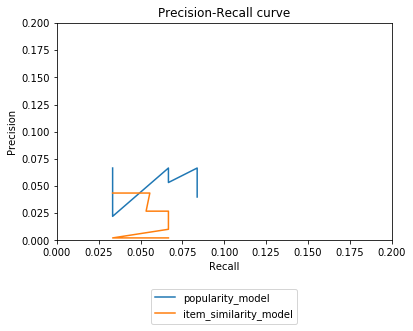

In [44]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")